# CHS vector

First, create the $Q$-matrix from the CH82 model.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from HJCFIT.likelihood import QMatrix

tau = 1e-4
qmatrix = QMatrix([[ -3050,        50,  3000,      0,    0 ], 
                   [ 2./3., -1502./3.,     0,    500,    0 ],  
                   [    15,         0, -2065,     50, 2000 ],  
                   [     0,     15000,  4000, -19000,    0 ],  
                   [     0,         0,    10,      0,  -10 ] ], 2)

Then create the missed-events likelihood function $^{e}G$ from which the CHS vectors can be found. 
We compare the vectors to prior results.

In [5]:
from HJCFIT.likelihood import MissedEventsG

eG = MissedEventsG(qmatrix, tau)
assert np.all(abs(eG.initial_CHS_vectors(4e-3) - [0.220418, 0.779582]) < 1e-5)
assert np.all(abs(eG.final_CHS_vectors(4e-3) - [0.974852, 0.21346, 0.999179]) < 1e-5)
np.set_printoptions(precision=15)

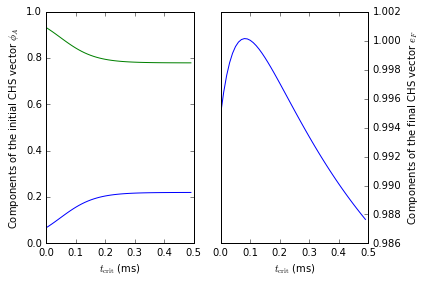

In [6]:
fig, ax = plt.subplots(1, 2)

x = np.arange(0, 5*tau, tau/10)

ax[0].plot(x*1e3, [eG.initial_CHS_vectors(u)[0] for u in x])
ax[0].set_xlabel('$t_{\mathrm{crit}}$ (ms)')
ax[0].set_ylabel('Components of the initial CHS vector $\phi_A$')

ax[1].plot(x*1e3, [eG.final_CHS_vectors(u)[0] for u in x])
ax[1].set_xlabel('$t_{\mathrm{crit}}$ (ms)')
ax[1].set_ylabel('Components of the final CHS vector $e_F$')
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")

fig.tight_layout()

In [7]:
qmatrix = QMatrix([[ -3050,        50,  3000,      0,    0 ], 
                   [ 2./3., -1502./3.,     0,    500,    0 ],  
                   [    15,         0, -2065,     50, 2000 ],  
                   [     0,     15000,  4000, -19000,    0 ],  
                   [     0,         0,    10,      0,  -10 ] ], 2)
qmatrix.matrix /= 1e3
eG = MissedEventsG(qmatrix, 0.2)
print(eG.initial_CHS_vectors(4))
print(eG.final_CHS_vectors(4))

[[ 0.17394315362718  0.82605684637282]]
[ 0.976491211386195  0.222305380522348  0.999257244552635]


In [8]:
qmatrix = QMatrix([[-1, 1, 0], [19, -29, 10], [0, 0.026, -0.026]], 1)
eG = MissedEventsG(qmatrix, 0.2)
print(eG.initial_CHS_vectors(0.2))
print(eG.final_CHS_vectors(4))

[ 1.]
[ 0.369080824446409  0.942440306684312]


In [9]:
qmatrix = QMatrix([ [-2,    1,   1,    0], 
                    [ 1, -101,   0,  100], 
                    [50,    0, -50,    0],
                    [ 0,  5.6,   0, -5.6]], 1)
eG = MissedEventsG(qmatrix, 0.2)
print(eG.initial_CHS_vectors(4))
print(eG.final_CHS_vectors(4))

[ 1.]
[ 0.846530054887703  0.168045183806245  0.852959014045745]
